#### BANKING: DIRECT MARKETING CASE STUDY (CAMPAIGN RESPONSE MODEL) - CLASSIFICATION MODEL

**OBJECTIVE:** This example uses data related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be subscribed ('yes') or not ('no').

##### Bank client data:
- age (numeric)
- job: type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- marital: marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

##### Related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular', 'telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

##### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

##### social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)     
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)


##### Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### NOTES ABOUT RESPONSE MODELS:
#### Targeting the Right Prospects: What are Response Models?

Response models use data mining to find similarities between responders from previous marketing campaigns to predict who is likely or not likely to respond to a future campaign. The model is then scored against the prospects of the new campaign and a marketer can choose to mail only those people that are most likely to purchase. This increases conversions and decreases costs by only mailing to those most likely to respond.

- Direct Marketing Models: Good, Better, Best

Not all models are created equal. Here’s a quick summary of different types of direct marketing models:

#### GOOD. Recency, Frequency, Monetary (RFM) models:

- simple, better than not modeling

- Though very basic, many marketers still rely on RFM models. Technically RFM models aren’t actually response models since they are descriptive but not truly predictive. This method emphasizes customer behavior and segments by how recently a customer purchased, how often they purchase, and how much they spend.

- RFM can identify good customers and provide a lift in response rates versus not using any targeting. Another benefit is that it is both simple and descriptive, so it is easily understood by business people.

- Unfortunately, RFM doesn’t take into account life stage and assumes that customers are likely to continue to respond the same way. If RFM is the only targeting method, the most attractive segments are likely to be over-marketed to at the expense of other segments that could be invested in.

#### BETTER. Traditional Response or Regression Models: 
- more sophisticated and predictive than RFM

- Regression models determine the correlation between variables. Unlike RFM models, regression takes into account that scores can quickly change when combined with other variables. 

- The model is developed specifically to predict a desired behavior, such as response. Response models require both responder and non-responder data to identify patterns of those likely to respond to a marketing campaign.

- This is by far the most widely used approach for marketers and has been a mainstay of predictive analytics for decades.

#### BEST. Multi-Channel Customer Level Response Models: 
- A New Approach that Outperforms Traditional

- This innovative approach identifies not only those prospects most likely to purchase, but also which marketing channel they are most likely to respond to. This allows marketers to optimize their marketing budgets most effectively by contacting the prospect in the channel(s) they prefer and are most likely to be moved by.

- Multi-Channel Customer Level Response Models are different from traditional response models in that all of a prospect’s known activity is taken into account – email opens, web browsing, display ad click-throughs, mobile, purchase behavior – and not just direct mail behavior. With a more holistic view of the customer, a marketer can create the ideal customer contact strategy for each customer.

- In a recent head-to-head in the mail test with a major cataloger, the Multi-Channel Customer Level Response Model outperformed the traditional response model with a more than +14% lift in response rate. This increase translates into millions of dollars in new annual revenue at the current spend. A new subject line or pretty picture won’t drive revenue like that!

In [8]:
pip install sweetviz

     |████████████████████████████████| 15.1MB 302kB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [9]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import sweetviz as sv
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

import statsmodels.formula.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.preprocessing import MinMaxScaler



<Figure size 432x216 with 0 Axes>

In [10]:
## Load the data
data=pd.read_csv('bank-additional.csv', sep=";")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4119.0,40.113620,10.313362,18.000,32.000,38.000,47.000,88.000
duration,4119.0,256.788055,254.703736,0.000,103.000,181.000,317.000,3643.000
campaign,4119.0,2.537266,2.568159,1.000,1.000,2.000,3.000,35.000
pdays,4119.0,960.422190,191.922786,0.000,999.000,999.000,999.000,999.000
previous,4119.0,0.190337,0.541788,0.000,0.000,0.000,0.000,6.000
emp.var.rate,4119.0,0.084972,1.563114,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,4119.0,93.579704,0.579349,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,4119.0,-40.499102,4.594578,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,4119.0,3.621356,1.733591,0.635,1.334,4.857,4.961,5.045
nr.employed,4119.0,5166.481695,73.667904,4963.600,5099.100,5191.000,5228.100,5228.100


In [15]:
html=sv.analyze(data)
html.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Basic Exploratory Analysis

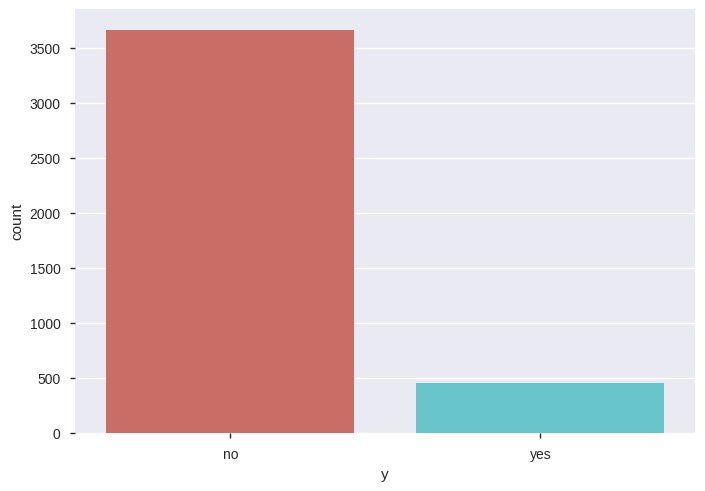

In [17]:
#dependent variable distribution (response vs. non response)
sns.countplot(x='y',data=data, palette='hls')
plt.show()

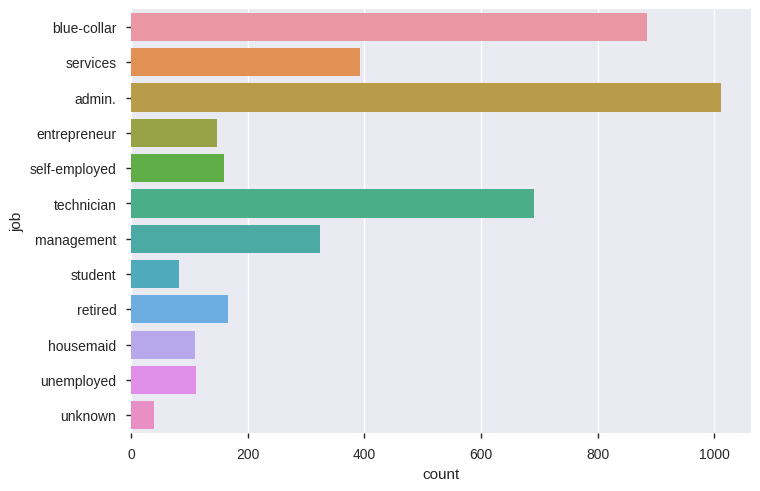

In [18]:
#Customer Job Distribution

sns.countplot(y="job", data=data)
plt.show()

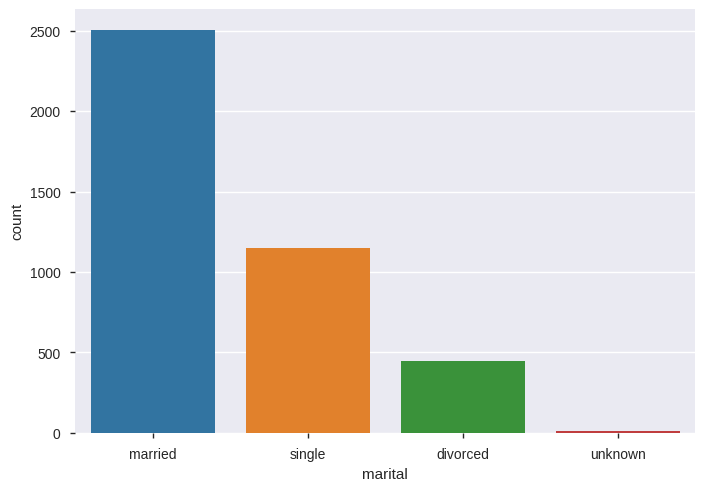

In [19]:
#Customer marital status distribution
sns.countplot(x="marital", data=data)
plt.show()

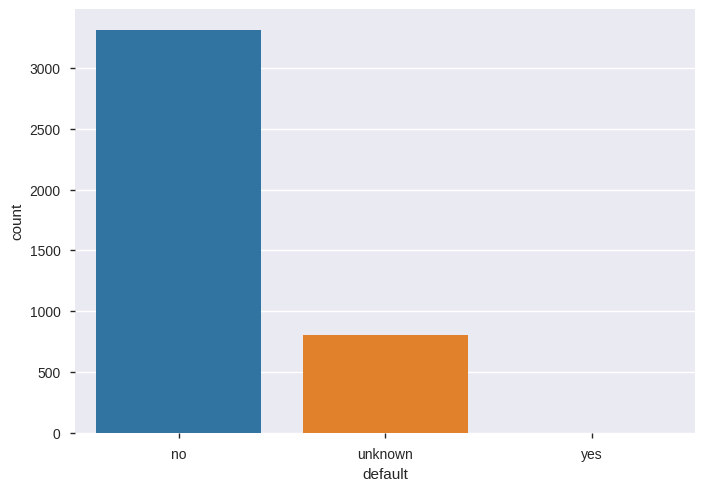

In [20]:
# Distribution of Default
sns.countplot(x="default", data=data)
plt.show()

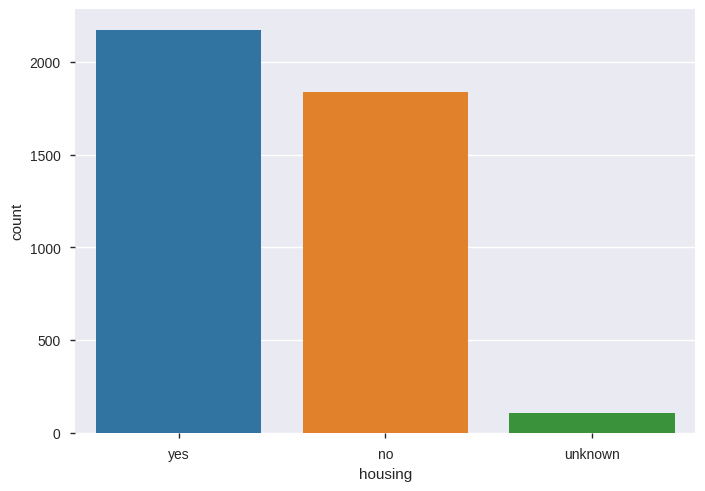

In [21]:
#house loan Distribution
sns.countplot(x="housing", data=data)
plt.show()

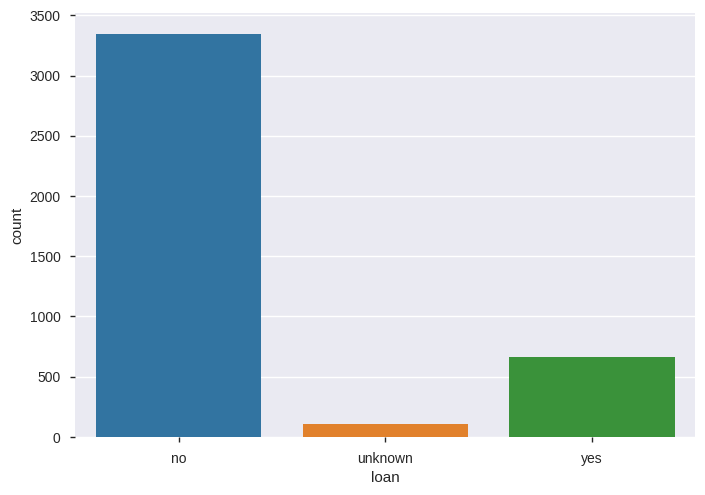

In [22]:
#personal Loan
sns.countplot(x="loan", data=data)
plt.show()

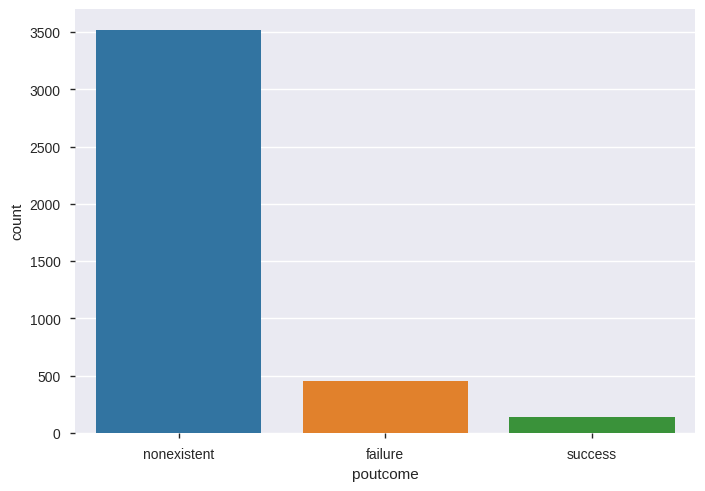

In [23]:
# Previous Marketing campaign response
sns.countplot(x="poutcome", data=data)
plt.show()

#### identifying relationships (between Y & numerical independent variables by comparing means)

In [24]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
yes,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


##### Observations:
- The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
- The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
- Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

In [25]:
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [26]:
data_num=data[numeric_var_names]
data_num.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8


In [27]:
data_cat = data[cat_var_names]
data_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent,no
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent,no
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent,no
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent,no


In [28]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=data_num.apply(lambda x: var_summary(x)).T

In [29]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,4119.0,0.0,1.652280e+05,40.113620,38.000,10.313362,106.365426,18.000,24.000,26.0000,28.800,32.000,38.000,47.000,55.000,58.000,68.000,88.000
duration,4119.0,0.0,1.057710e+06,256.788055,181.000,254.703736,64873.993194,0.000,11.000,35.0000,60.000,103.000,181.000,317.000,545.200,740.200,1231.660,3643.000
campaign,4119.0,0.0,1.045100e+04,2.537266,2.000,2.568159,6.595442,1.000,1.000,1.0000,1.000,1.000,2.000,3.000,5.000,7.000,13.000,35.000
pdays,4119.0,0.0,3.955979e+06,960.422190,999.000,191.922786,36834.355710,0.000,3.000,999.0000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000
previous,4119.0,0.0,7.840000e+02,0.190337,0.000,0.541788,0.293535,0.000,0.000,0.0000,0.000,0.000,0.000,0.000,1.000,1.000,3.000,6.000
emp.var.rate,4119.0,0.0,3.500000e+02,0.084972,1.100,1.563114,2.443327,-3.400,-3.400,-2.9000,-1.800,-1.800,1.100,1.400,1.400,1.400,1.400,1.400
cons.price.idx,4119.0,0.0,3.854548e+05,93.579704,93.749,0.579349,0.335645,92.201,92.201,92.7130,92.893,93.075,93.749,93.994,94.465,94.465,94.601,94.767
cons.conf.idx,4119.0,0.0,-1.668158e+05,-40.499102,-41.800,4.594578,21.110142,-50.800,-50.000,-47.1000,-46.200,-42.700,-41.800,-36.400,-36.100,-33.600,-26.900,-26.900
euribor3m,4119.0,0.0,1.491636e+04,3.621356,4.857,1.733591,3.005339,0.635,0.677,0.8084,1.029,1.334,4.857,4.961,4.964,4.966,4.968,5.045
nr.employed,4119.0,0.0,2.128074e+07,5166.481695,5191.000,73.667904,5426.960015,4963.600,4963.600,5008.7000,5076.200,5099.100,5191.000,5228.100,5228.100,5228.100,5228.100,5228.100


In [33]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

data_num=data_num.apply(lambda x: outlier_capping(x))

In [34]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

data_num=data_num.apply(lambda x: Missing_imputation(x))

In [35]:
data_num.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.040934,-0.008758,-0.035564,0.033328,-0.010420,0.001573,0.096817,-0.004651,-0.028978
duration,0.040934,1.000000,-0.089582,-0.049637,0.030562,-0.032984,0.014668,-0.033930,-0.039042,-0.051082
campaign,-0.008758,-0.089582,1.000000,0.062852,-0.099728,0.183264,0.147637,0.013359,0.165349,0.167031
pdays,-0.035564,-0.049637,0.062852,1.000000,-0.585427,0.270687,0.061562,-0.094064,0.301296,0.381992
previous,0.033328,0.030562,-0.099728,-0.585427,1.000000,-0.437248,-0.191644,-0.054162,-0.477506,-0.528209
emp.var.rate,-0.010420,-0.032984,0.183264,0.270687,-0.437248,1.000000,0.758841,0.194679,0.970390,0.897173
cons.price.idx,0.001573,0.014668,0.147637,0.061562,-0.191644,0.758841,1.000000,0.051647,0.661925,0.478685
cons.conf.idx,0.096817,-0.033930,0.013359,-0.094064,-0.054162,0.194679,0.051647,1.000000,0.275962,0.104488
euribor3m,-0.004651,-0.039042,0.165349,0.301296,-0.477506,0.970390,0.661925,0.275962,1.000000,0.942507
nr.employed,-0.028978,-0.051082,0.167031,0.381992,-0.528209,0.897173,0.478685,0.104488,0.942507,1.000000


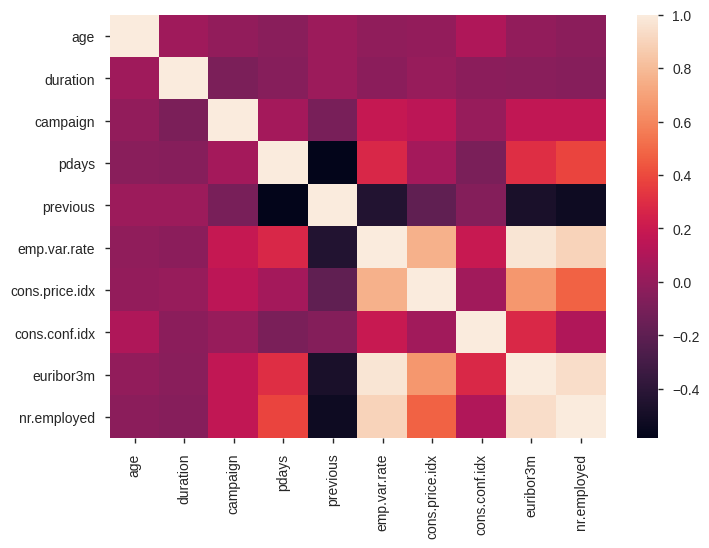

In [36]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(data_num.corr())

In [37]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=data_cat.apply(cat_summary)

In [38]:
cat_summary

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
N,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
NMISS,0,0,0,0,0,0,0,0,0,0,0
ColumnsNames,admin. 1012 blue-collar 884 te...,married 2509 single 1153 divorced ...,university.degree 1264 high.school ...,no 3315 unknown 803 yes ...,yes 2175 no 1839 unknown 10...,no 3349 yes 665 unknown 10...,cellular 2652 telephone 1467 Name: cont...,may 1378 jul 711 aug 636 jun 53...,thu 860 mon 855 tue 841 wed 795 fr...,nonexistent 3523 failure 454 succes...,"no 3668 yes 451 Name: y, dtype: int64"


## Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [39]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    #col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [40]:
cat_var_names

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [41]:
#for c_feature in categorical_features
data_cat_new = data_cat
for c_feature in cat_var_names:
    data_cat_new[c_feature] = data_cat_new[c_feature].astype('category')
    data_cat_new = create_dummies(data_cat_new , c_feature )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [42]:
data_cat_new.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0


In [43]:
data_new = pd.concat([data_num, data_cat_new], axis=1)

In [44]:
data_new.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,30,487.0,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,39,346.0,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,25,227.0,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
3,38,17.0,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,47,58.0,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0


In [45]:
data_new.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_s

In [46]:
data_new.columns= [var.strip().replace('-', '_') for var in data_new.columns]
data_new.columns= [var.strip().replace('.', '_') for var in data_new.columns]
data_new.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic_6y', 'education_basic_9y', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_s

##### Feature Selection

#### Dropping columns based on data audit report
        - Based on low variance (near zero variance)
        - High missings (>25% missings)
        - High correlations between two numerical variables

In [47]:
data_new.drop(columns=['pdays', 'cons_price_idx', 'nr_employed', 'euribor3m' ], axis=1, inplace=True)

In [48]:
data_new.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp_var_rate',
       'cons_conf_idx', 'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic_6y', 'education_basic_9y', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'y_yes'],
      dtype='object')

#### Variable Reduction using univariate Regression (short list based on Somer's D values)

In [50]:
somersd_df = pd.DataFrame()
for num_variable in data_new.columns.difference(['y_yes']):
    logreg = sm.logit(formula = str('y_yes ~ ')+str(num_variable), data=data_new)
    result = logreg.fit()
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(data_new['y_yes'],y_score) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.344178
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.341558
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.343930
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.334952
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.345418
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.345447
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.345451
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.345421
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.342154
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.345425
  

In [51]:
somersd_df.sort_values('SomersD', ascending=False, inplace=True)

In [52]:
somersd_df

,Variable Name,SomersD
0,duration,0.643265
0,emp_var_rate,0.412654
0,previous,0.243887
0,poutcome_nonexistent,0.233411
0,contact_telephone,0.210711
0,poutcome_success,0.19036
0,month_may,0.151588
0,campaign,0.107061
0,default_unknown,0.0969142
0,job_blue_collar,0.089118


In [53]:
somersd_df.to_csv('Univariate Regression Results.csv')

#### Variable Reduction using Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [54]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = data_new[data_new.columns.difference(['y_yes'])]
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X, data_new[['y_yes']] )
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

[False False False  True False False False False False False False False
 False False False False False False  True False False  True  True False
  True False  True  True False False False  True False False False False
 False False  True False  True  True  True  True  True False False  True
 False]
[26 18 23  1 33 29 22 11 19 34 32 27 20 21  4 12 13  2  1  5 10  1  1 24
  1  6  1  1 17 31  8  1  9 14 16 15 25  3  1 30  1  1  1  1  1 28 35  1
  7]


In [55]:
X.columns

Index(['age', 'campaign', 'cons_conf_idx', 'contact_telephone',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'default_unknown', 'default_yes', 'duration',
       'education_basic_6y', 'education_basic_9y', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'emp_var_rate',
       'housing_unknown', 'housing_yes', 'job_blue_collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self_employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'loan_unknown', 'loan_yes', 'marital_married',
       'marital_single', 'marital_unknown', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_nonexistent', 'poutcome_success',
       'previous'],
      dtype='object')

In [56]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, rfe.get_support())]

feature_map

#Alternative of capturing the important variables
RFE_features=X.columns[rfe.get_support()]

selected_features_from_rfe = X[RFE_features]

In [57]:
RFE_features

Index(['contact_telephone', 'emp_var_rate', 'job_blue_collar',
       'job_entrepreneur', 'job_management', 'job_self_employed',
       'job_services', 'job_unknown', 'month_dec', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'poutcome_success'],
      dtype='object')

#### Variable reduction using Select K-Best technique

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [59]:
X = data_new[data_new.columns.difference(['y_yes'])]
X_new = SelectKBest(f_classif, k=15).fit(X, data_new[['y_yes']] )

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
X_new.get_support()

array([False,  True, False,  True, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True])

In [61]:
X_new.scores_

array([1.07452158e+01, 2.60174872e+01, 1.27264162e+01, 7.92202598e+01,
       2.90790761e-01, 5.08043133e-02, 1.79734348e-02, 2.61662472e-01,
       2.41642189e+01, 1.22929101e-01, 9.48321863e+02, 3.02118686e+00,
       8.19143521e+00, 2.11695352e-01, 1.22929101e-01, 9.08239458e-01,
       8.29635540e+00, 3.81126579e+00, 3.59027148e+02, 6.24594778e-01,
       3.43116164e-02, 1.90016167e+01, 4.84233138e+00, 1.04398956e-01,
       1.02985002e+00, 2.54443945e+01, 1.30421018e+00, 1.86043410e+00,
       1.28503269e+01, 3.35875260e-01, 4.45340354e+00, 1.93750397e-02,
       6.24594778e-01, 4.25808863e-01, 5.40132618e+00, 1.02344446e+01,
       3.90463264e-02, 6.05832744e-01, 4.35494114e+01, 6.20055347e+00,
       2.20718450e+00, 1.14899459e+02, 4.18556370e+01, 8.77370743e-01,
       4.65023507e+01, 5.95369089e+01, 1.84639707e+02, 4.88908229e+02,
       2.84381849e+02])

In [62]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, X_new.get_support())]

feature_map

#Alternative of capturing the important variables
KBest_features=X.columns[X_new.get_support()]

selected_features_from_KBest = X[KBest_features]

In [63]:
KBest_features

Index(['campaign', 'contact_telephone', 'default_unknown', 'duration',
       'emp_var_rate', 'job_blue_collar', 'job_retired', 'month_dec',
       'month_mar', 'month_may', 'month_oct', 'month_sep',
       'poutcome_nonexistent', 'poutcome_success', 'previous'],
      dtype='object')

#### Variance Inflation Factor assessment

In [64]:
X = pd.concat([data_new[data_new.columns.difference(['y_yes'])],data_new['y_yes']], axis=1)
features = "+".join(data_new.columns.difference(['y_yes']))
X.head()

,age,campaign,cons_conf_idx,contact_telephone,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,default_unknown,default_yes,duration,education_basic_6y,education_basic_9y,education_high_school,education_illiterate,education_professional_course,education_university_degree,education_unknown,emp_var_rate,housing_unknown,housing_yes,job_blue_collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self_employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_unknown,loan_yes,marital_married,marital_single,marital_unknown,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,previous,y_yes
0,30,2,-46.2,0,0,0,0,0,0,0,487.0,0,1,0,0,0,0,0,-1.8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,39,4,-36.4,1,0,0,0,0,0,0,346.0,0,0,1,0,0,0,0,1.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,25,1,-41.8,1,0,0,0,1,0,0,227.0,0,0,1,0,0,0,0,1.4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,38,3,-41.8,1,0,0,0,0,0,0,17.0,0,1,0,0,0,0,0,1.4,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,47,1,-42.0,0,1,0,0,0,0,0,58.0,0,0,0,0,0,1,0,-0.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [65]:
features

'age+campaign+cons_conf_idx+contact_telephone+day_of_week_mon+day_of_week_thu+day_of_week_tue+day_of_week_wed+default_unknown+default_yes+duration+education_basic_6y+education_basic_9y+education_high_school+education_illiterate+education_professional_course+education_university_degree+education_unknown+emp_var_rate+housing_unknown+housing_yes+job_blue_collar+job_entrepreneur+job_housemaid+job_management+job_retired+job_self_employed+job_services+job_student+job_technician+job_unemployed+job_unknown+loan_unknown+loan_yes+marital_married+marital_single+marital_unknown+month_aug+month_dec+month_jul+month_jun+month_mar+month_may+month_nov+month_oct+month_sep+poutcome_nonexistent+poutcome_success+previous'

In [66]:
a,b = dmatrices(formula_like='y_yes ~ '+ 'campaign+cons_conf_idx+contact_telephone+default_unknown+default_yes+duration+emp_var_rate+job_blue_collar+job_entrepreneur+job_management+job_retired+job_self_employed+job_student+month_dec+month_jun+month_mar+month_may+month_nov+month_oct+month_sep+poutcome_success+previous', data = data_new, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

    VIF Factor           features
0   112.264434          Intercept
1     1.057210           campaign
2     1.363093      cons_conf_idx
3     2.427855  contact_telephone
4     1.083696    default_unknown
5     1.003453        default_yes
6     1.016303           duration
7     2.035384       emp_var_rate
8     1.150884    job_blue_collar
9     1.039269   job_entrepreneur
10    1.059271     job_management
11    1.062026        job_retired
12    1.030559  job_self_employed
13    1.041657        job_student
14    1.079856          month_dec
15    1.881421          month_jun
16    1.075128          month_mar
17    2.216336          month_may
18    1.256311          month_nov
19    1.211377          month_oct
20    1.176324          month_sep
21    1.416038   poutcome_success
22    1.613470           previous


### Final list of variable selected for the model building from above steps

campaign, 
cons_conf_idx, 
contact_telephone, 
default_unknown,
default_yes,
duration,
emp_var_rate,
job_blue_collar,
job_entrepreneur,
job_management,
job_retired,
job_self_employed,
job_student,
month_dec,
month_jun,
month_mar,
month_may,
month_nov,
month_oct,
month_sep,
poutcome_success,
previous,


### Model Building:

I am planning to build Logistic regression, Decision Trees, KNN, Naive Bayes, Random forest classifier, Ensemble models (Bagging and boosting models), support vector classifier etc.